In [131]:
# Setting
## The path & packages
'upload'

'upload'

In [132]:
#Comment out the other paths and comment in your path
#path = r'C:\Users\heuse\Desktop\SE_Risk_Management-1/' #Daniel Path
#path = '/Users/mandoholzknecht/SE_Risk_Management/' # Path Mando
path = 'C:/Users/Fabio/OneDrive/Dokumente/Uni Innsbruck/WS20/Applied risk mgmt/SE/Heusli/SE_Risk_Management/' # Path Fabio

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.anova as anova
import scipy as sci

from sklearn import metrics

from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, auc
from sklearn.feature_selection import f_classif
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import chi2_contingency
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import datetime


# Loading the data

Loading the Training dataset + Test dataset

In [133]:
# use the realtive path finding
df_train = pd.read_csv(path + 'Training_Dataset.csv', sep=';', index_col=None)
df_test = pd.read_csv(path + 'Test_Dataset.csv', sep=';', index_col=0)


checking the data

In [134]:
df_train.head()

,id,default,legal_form,zip_code,sector,year_inc,count_emp,type_pl,sales,gross_performance,...,bonds_payables_lt,total_equity,current_assets,monetary_current_assets,cash,trade_receivables_st,trade_receivables_lt,cf_operating,cf_investment,cf_financing
0,C_405,0,GmbH & Co. KG,12359,46730,1900,NaN,GKV,1.068738e+08,1.068738e+08,...,NaN,3.224471e+07,37831990.81,17111465.66,10297047.50,NaN,NaN,6.986094e+06,-1.112342e+06,-7520392.09
1,C_292,0,GmbH & Co. KG,10719,70101,1976,NaN,GKV,1.393869e+06,1.407889e+06,...,NaN,4.508026e+06,4669178.63,927837.74,926383.75,NaN,NaN,-4.343980e+06,1.174427e+06,1128108.08
2,C_746,0,GmbH,13353,87100,1962,323.0,GKV,3.864034e+06,7.597353e+05,...,NaN,5.164048e+04,28101189.79,11116958.92,9146283.79,617816.28,NaN,9.548544e+06,-7.536444e+06,-22026.07
3,C_838,0,AG,12529,68320,1972,1.0,GKV,4.384786e+06,4.405058e+06,...,NaN,1.182011e+07,8238473.86,7519183.22,6890565.23,319848.26,NaN,1.715799e+06,-6.561222e+05,-169655.66
4,C_495,0,Einzelfirma,12165,47730,1908,NaN,GKV,1.104478e+08,1.104478e+08,...,NaN,4.547445e+08,35465651.58,8545183.94,5036615.09,516646.73,NaN,1.301809e+08,-1.419776e+08,12567030.80


In [135]:
df_test.head(8)

,legal_form,zip_code,sector,year_inc,count_emp,type_pl,sales,gross_performance,gross_profit,earn_from_op,...,bonds_payables_lt,total_equity,current_assets,monetary_current_assets,cash,trade_receivables_st,trade_receivables_lt,cf_operating,cf_investment,cf_financing
id,,,,,,,,,,,,,,,,,,,,,
C_411,GmbH,14089,69204,1986,NaN,GKV,728946.68,728946.68,209721.36,45390.50,...,NaN,NaN,64195.98,28659.19,5598.17,NaN,NaN,52632.64,-534.87,-5.457891e+04
C_896,GmbH,13127,87100,1992,181.0,GKV,708847.33,708847.33,738495.17,13017.29,...,NaN,442875.57,479144.25,452033.96,442835.62,NaN,NaN,-10575.21,-1295.42,-5.820000e-11
C_252,GmbH,14059,86101,1993,505.0,GKV,26025323.61,26015542.03,22022993.85,2086104.36,...,NaN,13733666.50,14504753.93,3441491.02,322075.13,3034766.29,NaN,2862349.65,-667342.46,-2.091456e+06
C_165,GmbH,10437,87100,1995,82.0,GKV,1105332.48,1105332.48,717405.05,88074.80,...,NaN,381990.95,371506.04,343269.12,256395.19,NaN,NaN,156251.71,-57344.11,-1.160000e-10
C_856,GmbH,14943,96090,2002,22.0,GKV,51995424.22,51979901.95,46420844.34,5956777.13,...,NaN,6828494.53,18909648.90,15619860.60,6720068.91,8847966.22,NaN,5696079.15,-1418555.39,-4.163971e+06
C_415,GmbH,10969,68321,2006,NaN,GKV,13597456.35,13597456.35,7667501.25,-109859.68,...,NaN,0.00,1273354.65,1277275.04,5848.43,136628.62,NaN,83600.84,1560281.10,-1.643803e+06
C_520,GmbH,10625,68100,2010,NaN,GKV,10365544.05,10365544.05,7931366.20,565338.94,...,NaN,8823433.07,7715921.82,7749440.79,6802934.01,855343.08,NaN,1051697.31,-366425.37,-5.398260e+03
C_127,GmbH,29308,87100,2007,NaN,GKV,10129943.12,10486827.90,5959584.15,435328.26,...,NaN,1990015.77,3451499.64,1352994.01,1349.09,986648.60,NaN,-56012.29,-533257.11,4.586848e+05


# Variables

## Renaming of some colums
We decided to not rename any varialbes

## Further variable coding
Transforming variables

### Transforming year_inc to age columns
Transforming the year of incorporation variable to two age variables: one numerical (age_num) one and one categorical one (age_cat). 

In [136]:
df_train['age_num'] = datetime.datetime.now().year - df_train["year_inc"]
df_train.sort_values(by="age_num",ascending=False).head(5)

,id,default,legal_form,zip_code,sector,year_inc,count_emp,type_pl,sales,gross_performance,...,total_equity,current_assets,monetary_current_assets,cash,trade_receivables_st,trade_receivables_lt,cf_operating,cf_investment,cf_financing,age_num
572,C_482,0,Freiberufler,61169,49310,0,NaN,GKV,635769.95,635769.95,...,37125.13,299815.83,268452.30,49009.81,NaN,NaN,-212829.13,-1.750000e-10,9.460000e-11,2020
477,C_597,1,Freiberufler,32457,71113,0,NaN,GKV,241456.04,216900.58,...,514698.88,639035.00,639951.26,7466.24,24518.87,NaN,14391.18,-7.090000e-11,1.204280e+03,2020
272,C_543,0,AG,86150,68101,1464,NaN,GKV,73165008.12,73165008.12,...,7797900.20,29653971.68,11687193.17,3444440.58,4254958.92,NaN,12170860.85,-6.620784e+05,-2.560090e+05,556
249,C_105,0,AG,76185,70101,1856,NaN,GKV,53372139.09,53110170.33,...,7522638.74,31608245.57,26918553.04,19531832.78,6509382.04,NaN,-10483605.89,-1.015179e+07,3.198861e+07,164
531,C_711,0,GmbH & Co. KG,42651,32501,1857,63.0,GKV,2713538.03,2713538.03,...,330130.46,625173.80,462636.78,66853.99,281981.84,NaN,133580.07,-5.635444e+04,3.780000e-10,163


As we have some firms which are pretty old (some > 100 years) and two outliers (2020s) we can set their value to the e.g.: 95% quantile as this shouldn't change the meaning of the age variable that much. They are long on the market and it does not really matter if they are long on the market (e.g.: 100 years) or very very long in the business (eg: above 500 years). 

In [137]:
#take a look on the quantiles
quantiles = list()
for i in range(0,100,):
    quantiles.append(df_train["age_num"].quantile(i/100))

age_th = df_train["age_num"].quantile(0.99)

#replace outliers with 99% quantile
df_train.loc[df_train["age_num"] > age_th,"age_num"] = age_th

df_train.sort_values(by="age_num",ascending=False).head(10)

,id,default,legal_form,zip_code,sector,year_inc,count_emp,type_pl,sales,gross_performance,...,total_equity,current_assets,monetary_current_assets,cash,trade_receivables_st,trade_receivables_lt,cf_operating,cf_investment,cf_financing,age_num
272,C_543,0,AG,86150,68101,1464,NaN,GKV,7.316501e+07,7.316501e+07,...,7.797900e+06,29653971.68,11687193.17,3444440.58,4254958.92,NaN,12170860.85,-6.620784e+05,-2.560090e+05,157.32
249,C_105,0,AG,76185,70101,1856,NaN,GKV,5.337214e+07,5.311017e+07,...,7.522639e+06,31608245.57,26918553.04,19531832.78,6509382.04,NaN,-10483605.89,-1.015179e+07,3.198861e+07,157.32
371,C_361,0,GmbH,21335,20520,1858,185.0,GKV,1.979305e+08,1.972723e+08,...,2.445527e+06,32809291.04,24618777.77,1012.13,24452421.93,NaN,11658956.29,-1.072492e+06,-1.088165e+07,157.32
572,C_482,0,Freiberufler,61169,49310,0,NaN,GKV,6.357699e+05,6.357699e+05,...,3.712513e+04,299815.83,268452.30,49009.81,NaN,NaN,-212829.13,-1.750000e-10,9.460000e-11,157.32
477,C_597,1,Freiberufler,32457,71113,0,NaN,GKV,2.414560e+05,2.169006e+05,...,5.146989e+05,639035.00,639951.26,7466.24,24518.87,NaN,14391.18,-7.090000e-11,1.204280e+03,157.32
283,C_519,0,GmbH,80807,18120,1862,NaN,GKV,1.560010e+06,4.462166e+06,...,3.912989e+05,1780853.40,507526.40,13989.13,NaN,NaN,-115009.30,-6.533309e+04,2.707314e+05,157.32
531,C_711,0,GmbH & Co. KG,42651,32501,1857,63.0,GKV,2.713538e+06,2.713538e+06,...,3.301305e+05,625173.80,462636.78,66853.99,281981.84,NaN,133580.07,-5.635444e+04,3.780000e-10,157.32
454,C_259,0,Freiberufler,44141,94110,1863,140.0,GKV,3.584665e+05,3.584665e+05,...,1.871424e+05,70476.90,61735.26,41618.21,NaN,NaN,22009.92,-1.400000e+05,1.307238e+05,157.00
165,C_347,0,GmbH,57072,25993,1866,116.0,GKV,2.645000e+05,2.645000e+05,...,1.834052e+04,186602.25,172230.65,1434.82,NaN,NaN,1484.67,4.500000e+01,0.000000e+00,154.00
445,C_019,0,AG,33689,70109,1870,107.0,GKV,2.432905e+06,2.432905e+06,...,-3.640000e-12,340903.37,340903.37,340903.37,NaN,NaN,1933900.10,0.000000e+00,-2.050780e+06,150.00


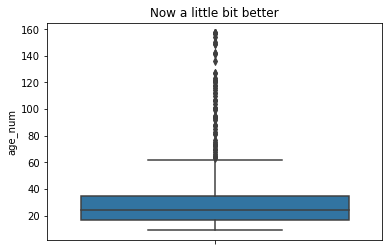

In [138]:
sns.boxplot(y=df_train["age_num"]).set_title("Now a little bit better");

AttributeError: module 'seaborn' has no attribute 'displot'

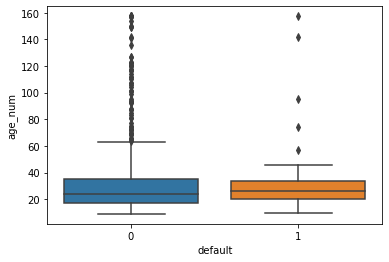

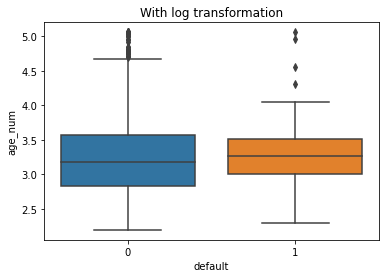

<Figure size 432x288 with 0 Axes>

In [139]:
sns.boxplot(y="age_num",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["age_num"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="age_num",hue="default",stat="density",common_norm=False);

In [ ]:
df_train["age_quartile"] = pd.qcut(df_train["age_num"],10)
pd.crosstab(df_train["default"],df_train["age_quartile"])

In [140]:
mdl = sm.Logit.from_formula('default ~ age_num + 1', data=df_train).fit(disp=False, maxiter=100)
print(mdl.summary2())

                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.000   
Dependent Variable: default          AIC:              295.6596
Date:               2020-12-21 18:30 BIC:              304.6712
No. Observations:   669              Log-Likelihood:   -145.83 
Df Model:           1                LL-Null:          -145.89 
Df Residuals:       667              LLR p-value:      0.72592 
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     7.0000                                     
----------------------------------------------------------------
            Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
----------------------------------------------------------------
Intercept  -2.8762    0.2531  -11.3634  0.0000  -3.3723  -2.3801
age_num     0.0019    0.0054    0.3576  0.7206  -0.0087   0.0126



In [141]:
df_train["age_cat"] = np.select([
     df_train['age_num'].between(0, 19, inclusive=True),
     df_train['age_num'].between(20, 29, inclusive=True),
     df_train['age_num'].between(30, 39, inclusive=True),
     df_train['age_num'].between(40, 49, inclusive=True),
     df_train['age_num'].between(50, 59, inclusive=True),
     df_train['age_num'].between(60, np.inf, inclusive=True)], 
    ['10-19','20-29','30-39','40-49','50-59','>59'],)

pd.crosstab(df_train["default"],df_train["age_cat"])

age_cat,10-19,20-29,30-39,40-49,50-59,>59
default,,,,,,
0,205,206,81,44,27,68
1,9,12,10,2,1,4


In [142]:
mdl = sm.Logit.from_formula('default ~ age_cat + 1', data=df_train).fit(disp=False, maxiter=100)
print(mdl.summary2())

                         Results: Logit
Model:               Logit            Pseudo R-squared: 0.018   
Dependent Variable:  default          AIC:              298.5732
Date:                2020-12-21 18:30 BIC:              325.6079
No. Observations:    669              Log-Likelihood:   -143.29 
Df Model:            5                LL-Null:          -145.89 
Df Residuals:        663              LLR p-value:      0.39087 
Converged:           1.0000           Scale:            1.0000  
No. Iterations:      7.0000                                     
----------------------------------------------------------------
                  Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------
Intercept        -3.1258   0.3406 -9.1781 0.0000 -3.7933 -2.4583
age_cat[T.20-29]  0.2828   0.4519  0.6259 0.5314 -0.6028  1.1684
age_cat[T.30-39]  1.0339   0.4778  2.1637 0.0305  0.0974  1.9705
age_cat[T.40-49]  0.0347   0.7992  0.0435 0.9653 -

In [143]:
catvar = [i for i in list(df_train.columns) if df_train[i].dtype=='O']

for i in catvar:
    tmp1 = pd.crosstab(df_train['default'], df_train[i]).apply(lambda x: np.round(x/x.sum() * 100,2)).T.sort_values(by = i ,ascending=False)
    tmp2 = pd.crosstab(df_train['default'], df_train[i]).T.rename(columns={False: 'N_False', True: 'N_True'})
    tmp3 = pd.DataFrame(tmp2.apply(sum, axis=1), columns=['N'])
    tmp4 = tmp3.apply(lambda x: np.round(x/x.sum() * 100,2)).rename(columns={'N': 'N_Perc'})
    tmp = tmp1.join(tmp2).join(tmp3).join(tmp4)
    print('====================================================')
    print('Variable: ',i)
    print('---------------------------------------------------')
    print(tmp)
    print()
    del tmp1, tmp2, tmp3, tmp4, tmp

Variable:  id
---------------------------------------------------
           0    1  N_False  N_True  N  N_Perc
id                                           
C_995  100.0  0.0        1       0  1    0.15
C_994  100.0  0.0        1       0  1    0.15
C_992  100.0  0.0        1       0  1    0.15
C_990  100.0  0.0        1       0  1    0.15
C_986  100.0  0.0        1       0  1    0.15
...      ...  ...      ...     ... ..     ...
C_006  100.0  0.0        1       0  1    0.15
C_004  100.0  0.0        1       0  1    0.15
C_002  100.0  0.0        1       0  1    0.15
C_001  100.0  0.0        1       0  1    0.15
C_000  100.0  0.0        1       0  1    0.15

[669 rows x 6 columns]

Variable:  legal_form
---------------------------------------------------
                              0      1  N_False  N_True    N  N_Perc
legal_form                                                          
Verein                   100.00   0.00        1       0    1    0.15
Sonst. Gewerbetreibende   88.2

# Understanding your data


## Univartiate descriptive anaylsis

The datatype of the variables is important as in dermines how you have to look at the data

In [144]:
catvar = [i for i in list(df_train.columns) if df_train[i].dtype=='O']
catvar # categorial variables

['id', 'legal_form', 'type_pl', 'age_cat']

In [145]:
numvar = [i for i in list(df_train.columns) if df_train[i].dtype in ['float64','int64']]
numvar # numberical variables

['default',
 'zip_code',
 'sector',
 'year_inc',
 'count_emp',
 'sales',
 'gross_performance',
 'gross_profit',
 'earn_from_op',
 'fin_result',
 'oth_interest_inc',
 'oth_interest_exp',
 'result_from_ord_bus',
 'total_result',
 'annual_profit',
 'total_assets',
 'total_liabilities_st',
 'total_liabilities_mt',
 'total_liabilities_lt',
 'bank_liabilities_st',
 'bank_liabilities_mt',
 'bank_liabilities_lt',
 'trade_payables_st',
 'trade_payables_mt',
 'trade_payables_lt',
 'bonds_payables_st',
 'bonds_payables_mt',
 'bonds_payables_lt',
 'total_equity',
 'current_assets',
 'monetary_current_assets',
 'cash',
 'trade_receivables_st',
 'trade_receivables_lt',
 'cf_operating',
 'cf_investment',
 'cf_financing',
 'age_num']

## Missing values

Overview of missing values in the data

In [146]:
df_train.isnull().sum().sort_values(ascending=False)

bonds_payables_lt          669
bonds_payables_st          669
trade_payables_lt          665
bonds_payables_mt          664
trade_payables_mt          648
trade_receivables_lt       645
bank_liabilities_lt        545
bank_liabilities_mt        483
trade_receivables_st       355
count_emp                  353
bank_liabilities_st        352
trade_payables_st          143
oth_interest_inc           127
oth_interest_exp            62
cash                        32
fin_result                  22
total_equity                21
gross_profit                 7
gross_performance            7
total_assets                 1
earn_from_op                 1
result_from_ord_bus          1
annual_profit                1
sales                        1
current_assets               1
cf_operating                 1
cf_investment                1
cf_financing                 1
sector                       0
year_inc                     0
zip_code                     0
legal_form                   0
default 

In [147]:
df_test.isnull().sum().sort_values(ascending=False)

bonds_payables_lt          330
bonds_payables_st          330
trade_payables_lt          330
bonds_payables_mt          329
trade_payables_mt          322
trade_receivables_lt       320
bank_liabilities_lt        250
bank_liabilities_mt        230
count_emp                  179
bank_liabilities_st        172
trade_receivables_st       169
trade_payables_st           65
oth_interest_inc            62
oth_interest_exp            23
cash                        18
total_equity                 9
fin_result                   8
gross_performance            3
gross_profit                 3
cf_investment                1
cf_operating                 1
cf_financing                 1
earn_from_op                 0
year_inc                     0
sector                       0
type_pl                      0
sales                        0
zip_code                     0
total_liabilities_mt         0
result_from_ord_bus          0
total_result                 0
annual_profit                0
total_as

# Data cleaning

In [150]:
# # drop comp that sucks big time because no values
df_train = df_train.loc[df_train["id"] != 'C_620'] 

# get total liabilities
df_train['total_liabilities'] = df_train['total_liabilities_st'] + df_train['total_liabilities_mt'] + df_train['total_liabilities_lt']

df_train.isnull().sum().sort_values(ascending=False)

bonds_payables_lt          668
bonds_payables_st          668
trade_payables_lt          664
bonds_payables_mt          663
trade_payables_mt          647
trade_receivables_lt       644
bank_liabilities_lt        544
bank_liabilities_mt        482
trade_receivables_st       354
count_emp                  353
bank_liabilities_st        351
trade_payables_st          142
oth_interest_inc           126
oth_interest_exp            61
cash                        31
fin_result                  21
total_equity                20
gross_performance            6
gross_profit                 6
cf_operating                 1
cf_investment                1
cf_financing                 1
earn_from_op                 0
zip_code                     0
legal_form                   0
sector                       0
year_inc                     0
type_pl                      0
sales                        0
default                      0
total_liabilities            0
total_liabilities_lt         0
result_f

## Predict NaN for total equity
Source: https://towardsdatascience.com/predict-missing-values-in-the-dataset-897912a54b7b


Check for correlation to get relevant variables for regression

In [151]:

cor_er = df_train['total_equity'].corr(df_train['total_result'])
cor_ea = df_train['total_equity'].corr(df_train['total_assets'])
cor_eo = df_train['total_equity'].corr(df_train['cf_operating'])


Split training and prediction dataset

In [152]:
cols = ['total_result', 'total_assets', 'cf_operating', 'total_equity']
df = df_train[cols]
test_df = df[df['total_equity'].isnull()]
df = df.dropna()

y_train = df['total_equity']
X_train = df.drop('total_equity', axis=1)
X_test = test_df.drop('total_equity', axis=1)

Train model to fit dataset and predict missing values from column total equity and replace them

In [153]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred)

[ 804154.57039482  826770.3743369   750108.4400077  2034060.76386615
  906958.71620787  757800.9886018   694739.75133316  777633.44217636
 1031927.82907443  707250.9930617   798206.66922869  753555.95951814
  938481.58223854  838818.88678533  728338.08877873  658229.22939662
  757045.94589862 3707034.78681172  430054.79880166  809294.10299164]


Replace the missing values with predicted values

In [154]:
df_train.loc[df_train.total_equity.isnull(), 'total_equity'] = y_pred

## Financial ratios

We use two liquidity ratios (measure a companies ability to meet its short term dept obligations) that we will weight as one to circumvent overfitting

1. working capital ratio = current assets/current liabilities (use log because of skewed data)

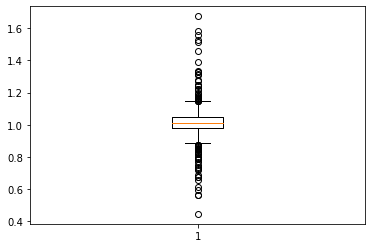

In [157]:
tr = df_train
tr['wc_ratio'] = np.log(tr['current_assets'])/np.log(tr['total_liabilities_st'])
plt.boxplot(tr.wc_ratio)
plt.show()

2. operating cash flow ratio = operating cf/current liabilities

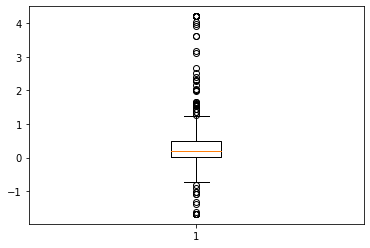

In [158]:
cf_pos = np.where(tr['cf_operating'] > 1, tr['cf_operating'], 0)
cf_neg = np.where(tr['cf_operating'] < -1, tr['cf_operating'], 0)
ocf = tr['cf_operating']/tr['total_liabilities_st']
# winsorize ocf
tr['ocf_ratio'] = sci.stats.mstats.winsorize(ocf, limits =[0.01, 0.015])
plt.boxplot(tr.ocf_ratio)
plt.show()

Next we use two solvency ratio (measure a companies ability to meet its long term dept obligations) that we will weight as one to circumvent overfitting

1. equity ratio = tot equity/total assets

0      0.982774
1      0.942056
2      0.608816
3      0.968864
4      0.958023
         ...   
664    0.897327
665    0.924091
666    0.000000
667    0.000000
668    0.797995
Name: equity_ratio, Length: 668, dtype: float64
count    668.000000
mean       0.840919
std        0.244647
min        0.000000
25%        0.845883
50%        0.920100
75%        0.957211
max        1.195405
Name: equity_ratio, dtype: float64


C:\Users\Fabio\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Fabio\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


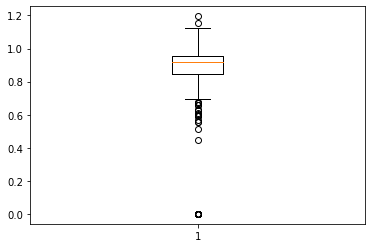

In [159]:
tr['equity_ratio'] = np.where(tr['total_equity'] > 1, np.log(tr['total_equity'])/np.log(tr['total_assets']), 0)
print(tr.equity_ratio)
print(tr.equity_ratio.describe())
plt.boxplot(tr.equity_ratio)
plt.show()

2. dept to equity ratio = total dept/total equity

count    668.000000
mean       1.004309
std        0.316616
min        0.000000
25%        0.966739
50%        1.042361
75%        1.133423
max        2.224372
Name: dept_to_equity, dtype: float64
0      0.939680
1      1.029047
2      1.469820
3      0.911417
4      1.014277
         ...   
664    1.100888
665    1.050137
666    0.000000
667    0.000000
668    1.249817
Name: dept_to_equity, Length: 668, dtype: float64
0.000000    46
1.316672     1
0.979086     1
0.919248     1
1.140547     1
            ..
1.110377     1
1.011722     1
1.234334     1
1.052017     1
1.009615     1
Name: dept_to_equity, Length: 623, dtype: int64


C:\Users\Fabio\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Fabio\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


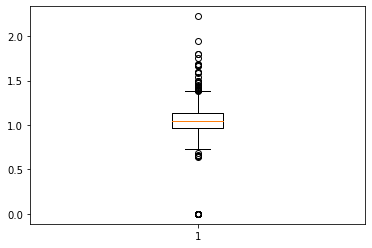

In [160]:
tr['dept_to_equity'] = np.where(tr['total_equity'] > 1, np.log(tr['total_liabilities'])/np.log(tr['total_equity']), 0)
print(tr.dept_to_equity.describe())
print(tr.dept_to_equity)
print(tr.dept_to_equity.value_counts()) #46 nulls
plt.boxplot(tr.dept_to_equity)
plt.show()

Create a dataframe with financial ratios and a heatmap to check for correlation between ratios

   wc_ratio  ocf_ratio  equity_ratio  dept_to_equity
0  1.103570   0.949635      0.982774        0.939680
1  0.974001  -0.617484      0.942056        1.029047
2  1.075391   1.130863      0.608816        1.469820
3  1.078651   0.665113      0.968864        0.911417
4  0.883952   0.374604      0.958023        1.014277
5  1.313287   3.180455      0.993943        0.765812
6  0.990158   0.394165      0.979141        0.969815
7  1.020241   2.055528      0.995213        0.893858
8  0.944483   0.023414      0.915823        1.077684
9  0.974708   0.278993      0.974618        0.943916
<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 0 to 668
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   wc_ratio        668 non-null    float64
 1   ocf_ratio       668 non-null    float64
 2   equity_ratio    668 non-null    float64
 3   dept_to_equity  668 non-null    float64
dtypes: float64(4)
memory usage: 26.1 KB
No

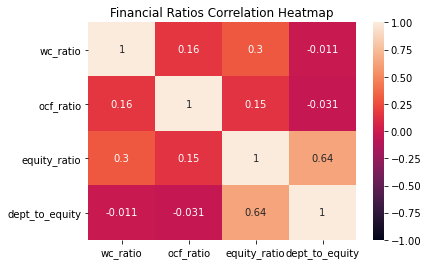

In [161]:
col = ['wc_ratio', 'ocf_ratio', 'equity_ratio', 'dept_to_equity']
data = df_train[col]
print(data.head(10))
print(data.info())

heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Financial Ratios Correlation Heatmap')
plt.show()

# PD Model preparation

## Dependent variabel: Good/Bad (default) definition

# PD model estimation

# PD model validation

## Out of sample validation (test)
### Evaluation of model performance: accuracy and area under the curve (AUC)
### Evalution of model performance: Gini

Test fabio